# Customer Churn Analysis – Exploratory Data Analysis (EDA)

This notebook explores the Telco Customer Churn dataset to understand:
- What factors cause customers to churn
- How customer behaviors differ between churned and retained customers
- Which features are likely to be important for prediction

The goal is to derive actionable business insights and prepare for machine learning modeling.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None) 


We begin by loading the data and understanding dataset structure:
- Feature types
- Missing values

In [2]:
data = pd.read_excel("../data/Telco_customer_churn.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
#Since customer ID serves no purpose in data analysis we remove it
data.drop("CustomerID",axis=1,inplace=True)

In [7]:
data.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
#since we already have columns lattitude and longitude separately we do not need the "Lat Long" column
data.drop("Lat Long",axis=1,inplace=True)

In [9]:
data.head()

,Count,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
data["Total Charges"].dtype


dtype('O')

In [11]:
#converting Total charges column to float
data["Total Charges"] = pd.to_numeric(data["Total Charges"],errors='coerce')

In [12]:
#filling in missing values for total charges column
data["Total Charges"].fillna(data["Total Charges"].median(),inplace = True)

<Axes: xlabel='Churn Label', ylabel='count'>

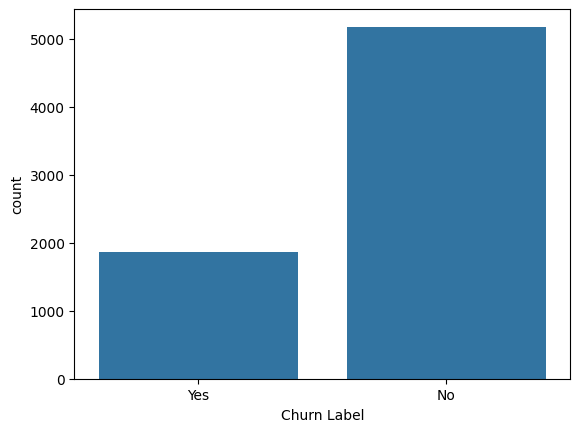

In [13]:
#EDA
# Target Variable Distribution
sns.countplot(x=data["Churn Label"])

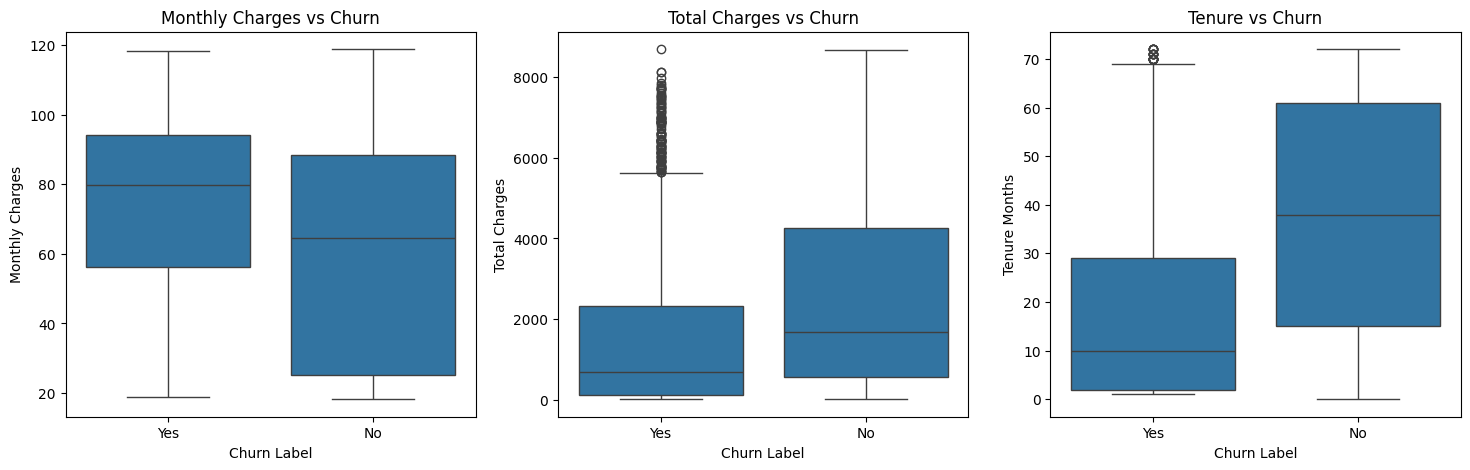

In [14]:
# Numerical Feature Analysis
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x="Churn Label", y="Monthly Charges", data=data, ax=axes[0])
sns.boxplot(x="Churn Label", y="Total Charges", data=data, ax=axes[1])
sns.boxplot(x="Churn Label", y="Tenure Months", data=data, ax=axes[2])
axes[0].set_title("Monthly Charges vs Churn")
axes[1].set_title("Total Charges vs Churn")
axes[2].set_title("Tenure vs Churn")
plt.show()


Insights:-

Monthly Charges:
Churned customers have higher median monthly charges, indicating price sensitivity or dissatisfaction with cost-to-value ratio.

Tenure:
A large proportion of churned customers have very low tenure (first 1–10 months).
This suggests early churn due to onboarding issues, unmet expectations, or competitive offers.

Total Charges:
Lower total charges among churned customers align with shorter tenure—customers are leaving early in their lifecycle.

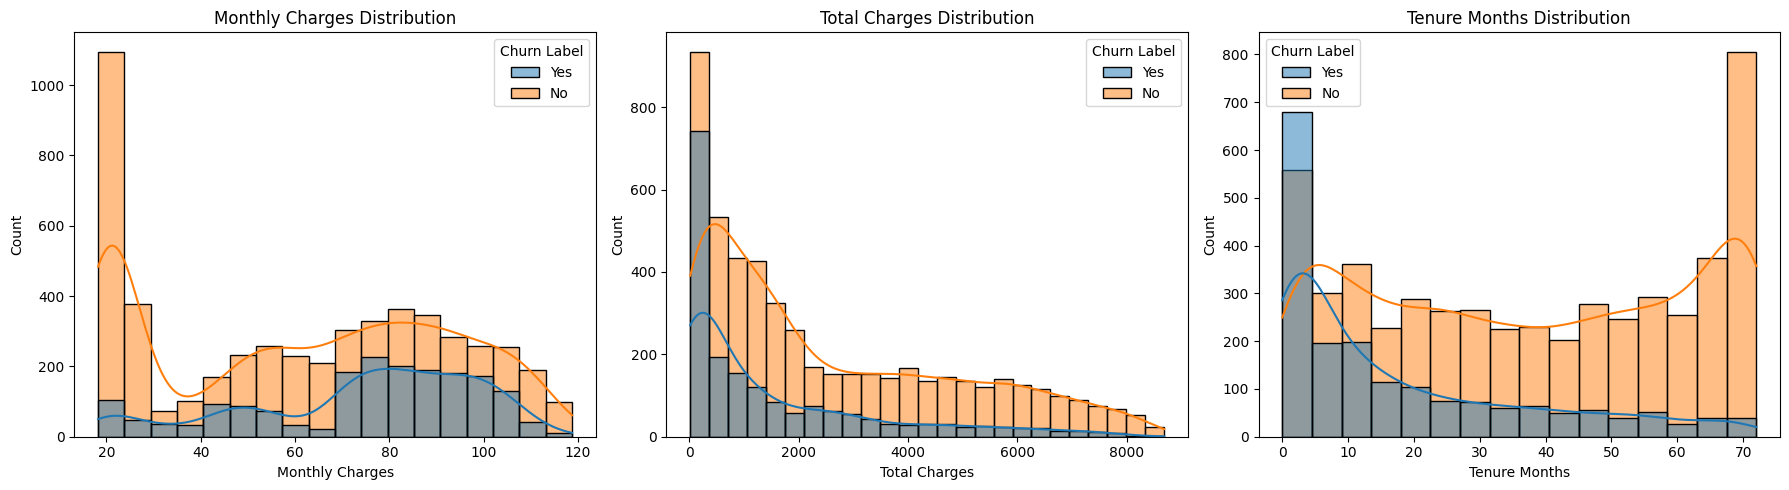

In [15]:
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.histplot(data=data, x="Monthly Charges", hue="Churn Label", kde=True)
plt.title("Monthly Charges Distribution")

plt.subplot(1,3,2)
sns.histplot(data=data, x="Total Charges", hue="Churn Label", kde=True)
plt.title("Total Charges Distribution")

plt.subplot(1,3,3)
sns.histplot(data=data, x="Tenure Months", hue="Churn Label", kde=True)
plt.title("Tenure Months Distribution")

plt.tight_layout()
plt.show()


From the above histogram we can coclude:-

Monthly Charges:
Churn frequency is highest in the $70–$110 range, reinforcing that higher bills correlate with higher churn.

Tenure:
The churn distribution heavily peaks in the first 10 months, confirming early churn as a major issue.

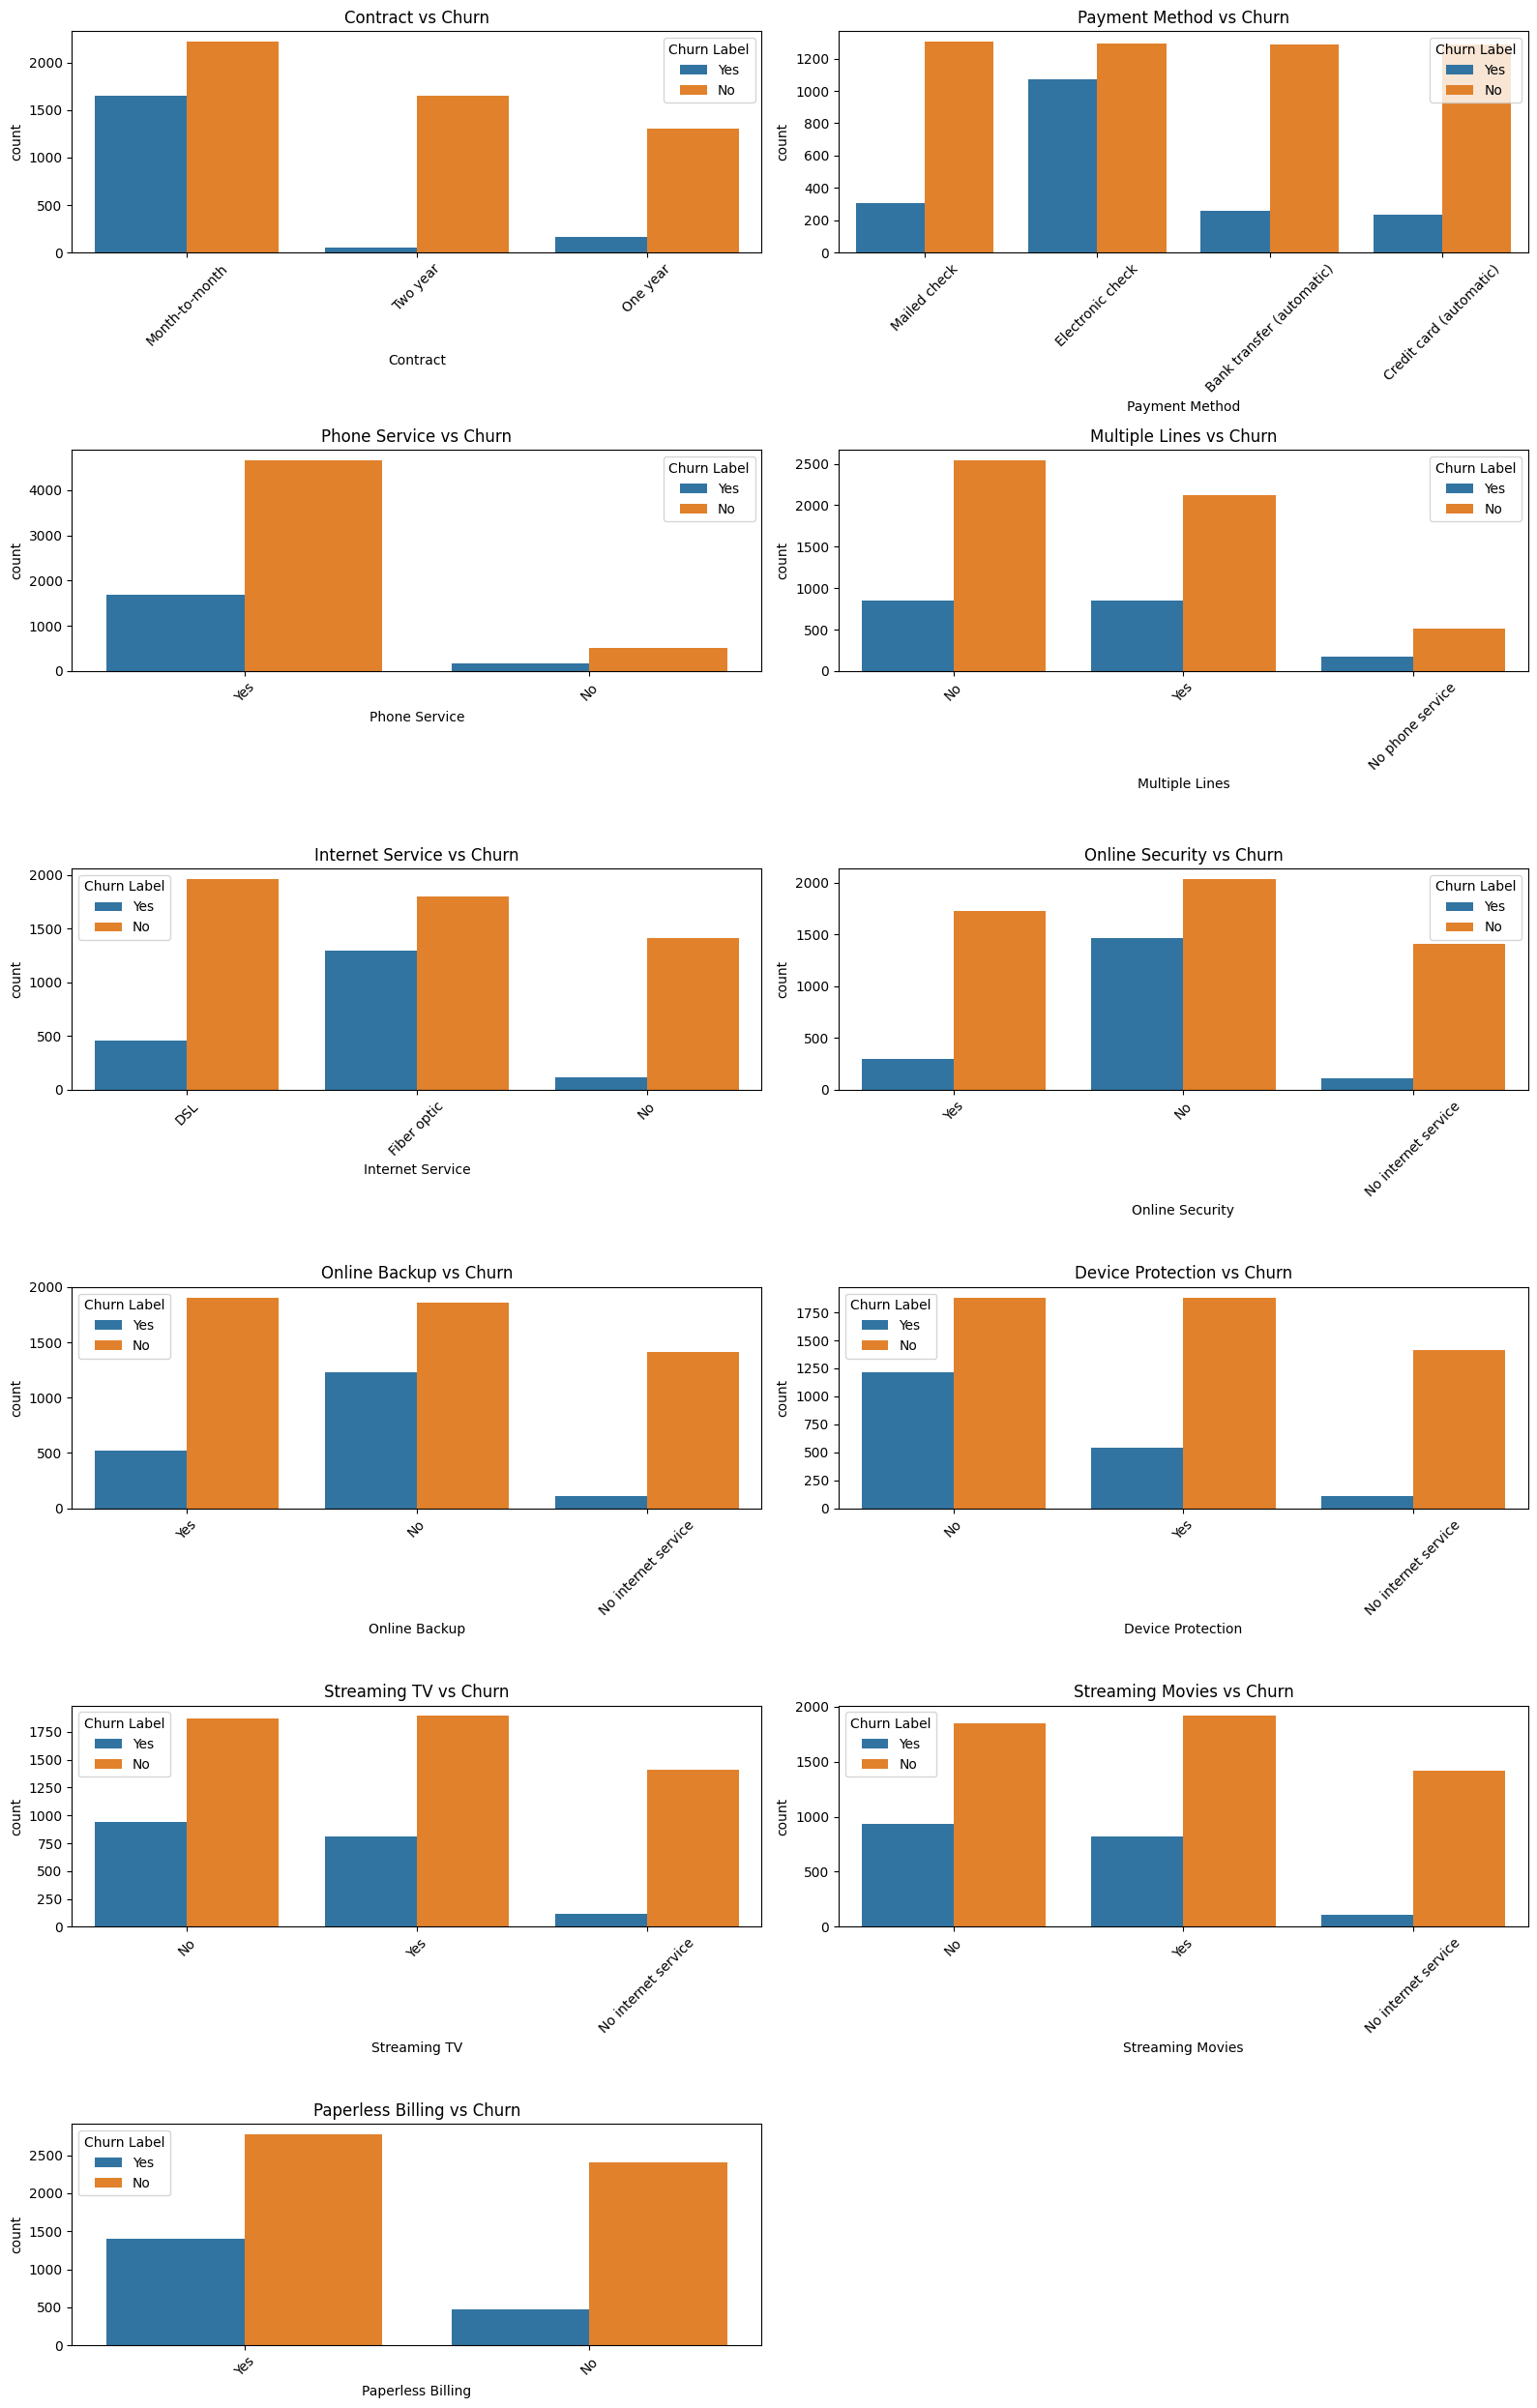

In [16]:
# Categorical Feature Analysis
categorical_cols = [
    "Contract", "Payment Method", "Phone Service", "Multiple Lines",
    "Internet Service", "Online Security", "Online Backup", 
    "Device Protection", "Streaming TV", "Streaming Movies",
    "Paperless Billing"
]

plt.figure(figsize=(16, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=col, hue="Churn Label", data=data)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Insights from the above countplot are as follows:-

Contract Type:
Month-to-month customers churn at significantly higher rates than one-year or two-year contract customers.

Payment Method:
Customers using Electronic Check have the highest churn.
Auto-payment methods (credit card, bank transfer) correlate with lower churn, possibly due to convenience and reduced friction.

Phone Service & Multiple Lines:
Minimal impact on churn—usage of these services appears unrelated to churn behavior.

Internet Service:
Fiber Optic customers churn more frequently, likely due to higher pricing or service dissatisfaction.

Add-On Services (Security, Backup, Protection):
Customers without add-on services churn significantly more.
Add-ons may indicate higher customer engagement and stickiness.

Streaming Services:
Streaming TV / Movies show weak correlation with churn—little impact.

Paperless Billing:
Slightly higher churn among paperless billing customers—possibly tied to customers using Electronic Check.

The churn rate plots show that:

Contract Type,
Internet Service,
Payment Method, and
Security / Backup / Protection add-ons

are the strongest predictors of churn.
These features show clear differences in churn probability and should be given higher weight in feature engineering and modeling.

In [17]:
# Churn Rate (%) by Category
def churn_rate_plot(column):
    churn_rate = (
        data.groupby(column)["Churn Label"]
        .apply(lambda x: (x == "Yes").mean() * 100)
        .sort_values(ascending=False)
    )
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=churn_rate.values, y=churn_rate.index)
    plt.title(f"Churn Rate (%) by {column}")
    plt.xlabel("Churn Rate (%)")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


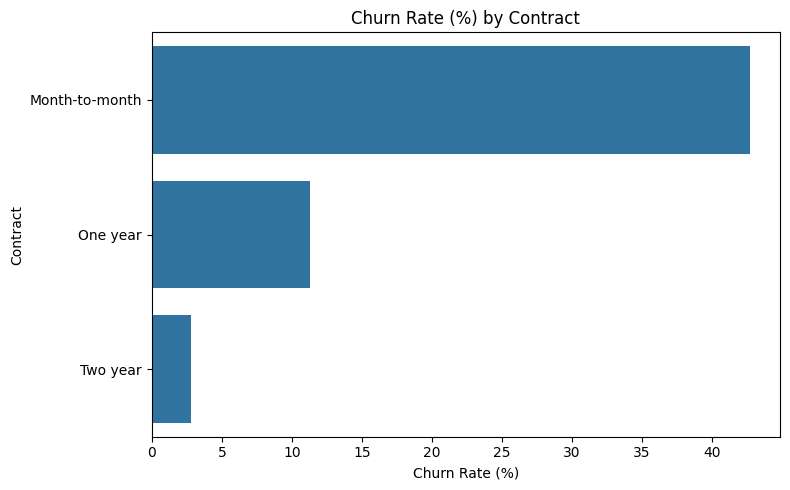

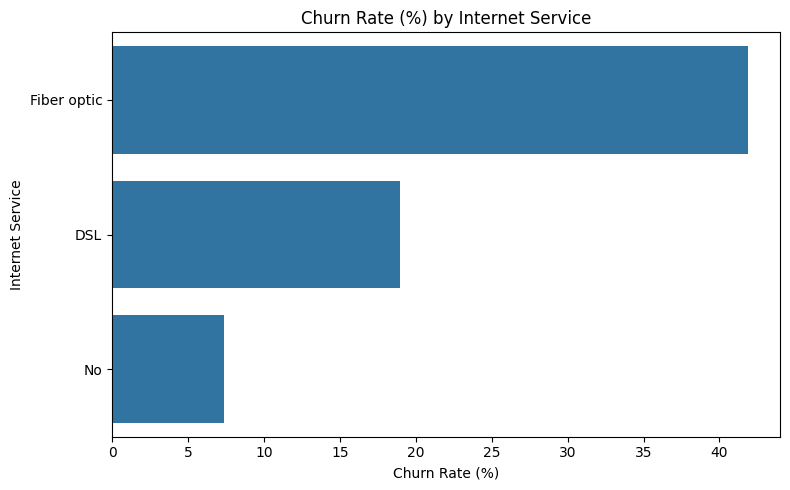

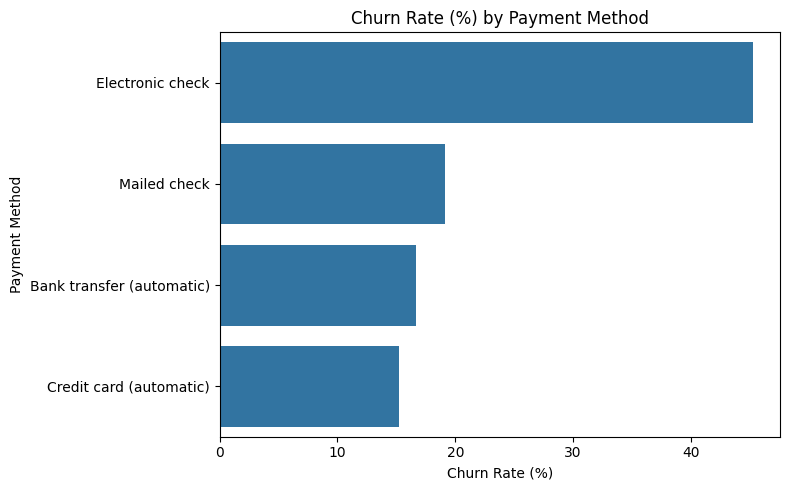

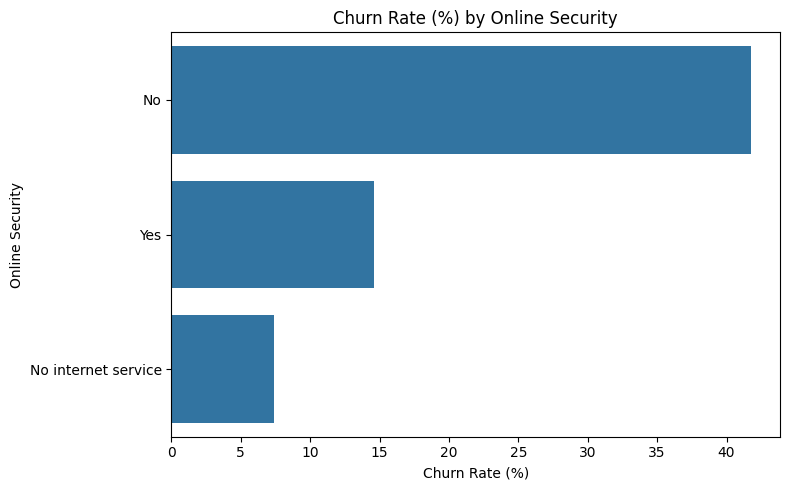

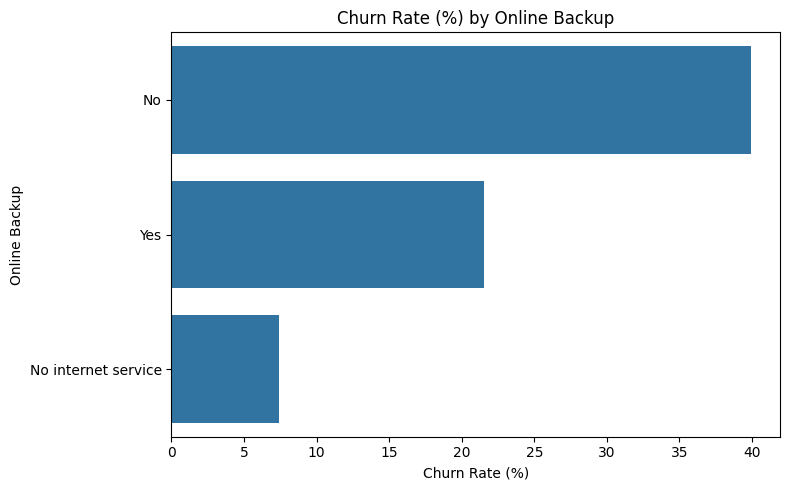

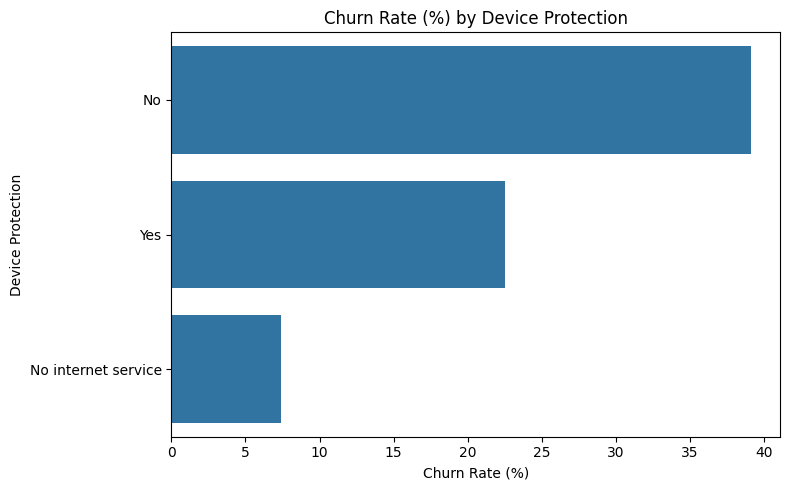

In [18]:
churn_rate_plot("Contract")
churn_rate_plot("Internet Service")
churn_rate_plot("Payment Method")
churn_rate_plot("Online Security")
churn_rate_plot("Online Backup")
churn_rate_plot("Device Protection")


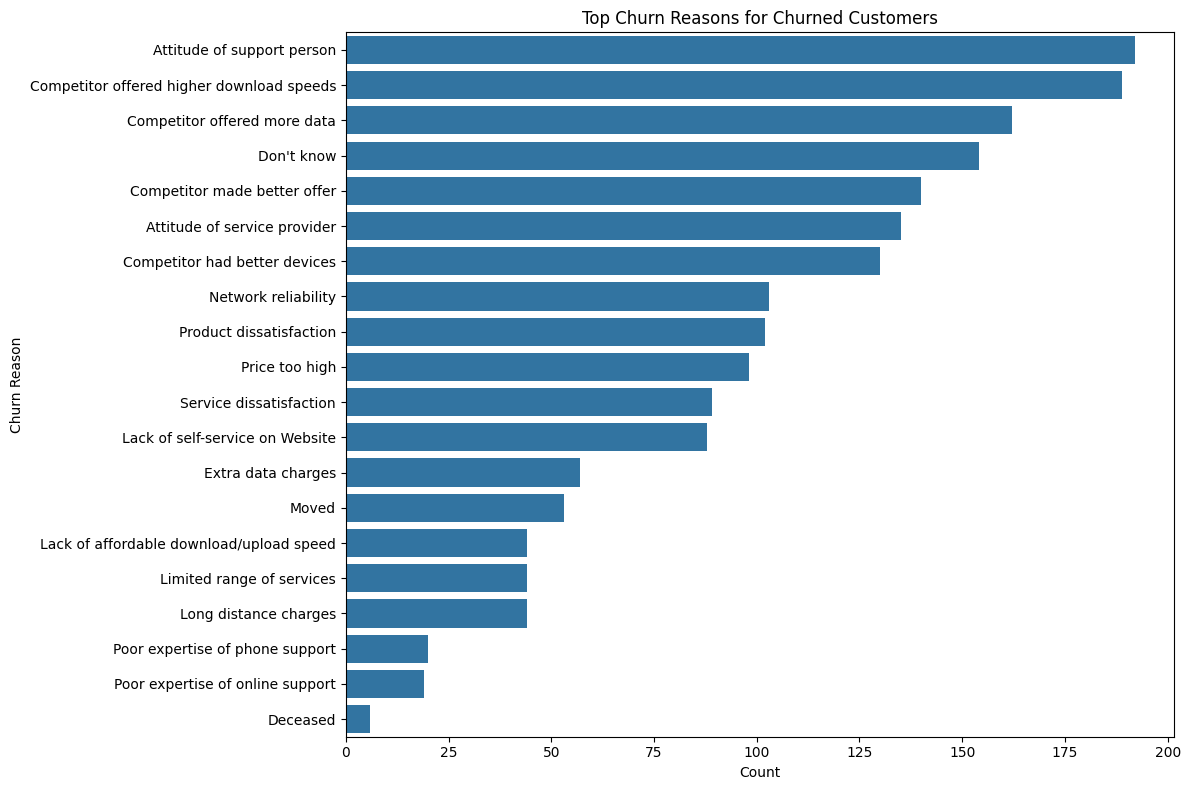

In [19]:
# Top Churn Reasons

reason = data[data["Churn Label"] == "Yes"]["Churn Reason"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=reason.values, y=reason.index)
plt.title("Top Churn Reasons for Churned Customers")
plt.xlabel("Count")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()


Among customers who churned, the most common reasons are:-

Competitor-related offers,
Attitude of support representatives,
Dissatisfaction with product or service quality,
High prices